<a href="https://colab.research.google.com/github/Hiteshwalia4/Sem_3_MCA/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x=df.iloc[:,2:4].values

In [5]:
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [6]:
y=df.iloc[:,-1].values

In [7]:
y[:5]

array([0, 0, 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [10]:
log.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pre=log.predict(x_test)

In [12]:
y_pre[:5]

array([0, 0, 0, 0, 0])

In [13]:
result = pd.DataFrame({"Actual_Pre":y_test , "prediction":y_pre})

In [14]:
result

,Actual_Pre,prediction
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
75,0,0
76,1,0
77,1,0
78,0,0


<ipython-input-15-69bbf281caac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df.corr()


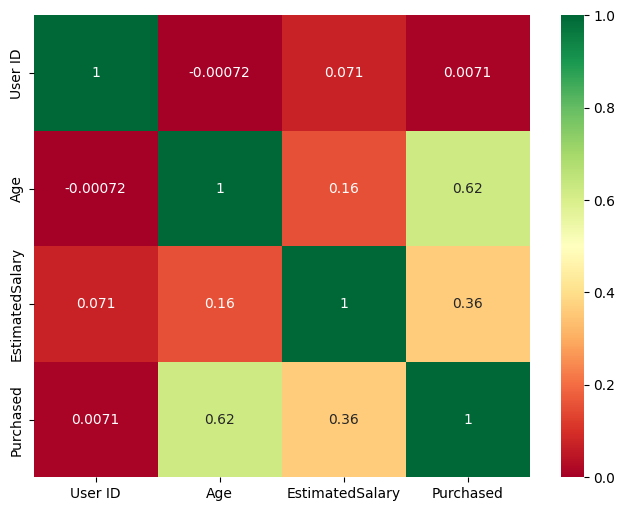

In [15]:
corrmat=df.corr()
top=corrmat.index
plt.figure(figsize=(8,6))
map=sns.heatmap(df[top].corr(),annot=True,cmap='RdYlGn')

In [16]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (6,4), fontsize=14):

    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')

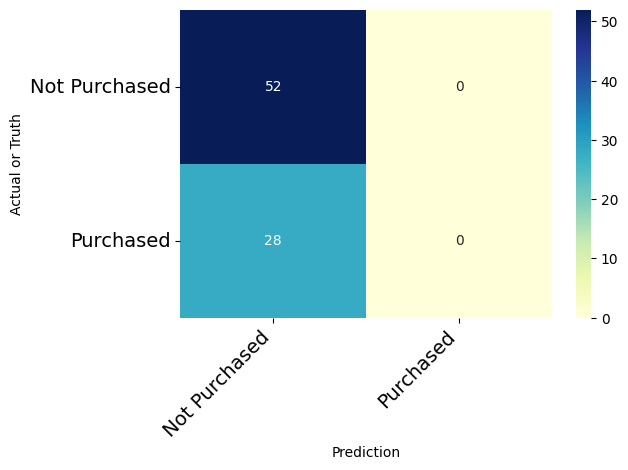

In [17]:
cm = confusion_matrix(y_test,y_pre)
print_confusion_matrix(cm,["Not Purchased","Purchased"])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Standardizing the data before fitting into model to improve the accuracy of model
from sklearn.preprocessing import StandardScaler
ob = StandardScaler()
x_train_scaled = ob.fit_transform(x_train)

In [30]:
x_test_scaled = ob.transform(x_test)
x_test_scaled

array([[ 0.79753468, -1.40447546],
       [ 2.07309956,  0.51542886],
       [-0.96863208, -0.76450736],
       [ 0.99377543,  0.74814454],
       [-0.87051171, -1.22993871],
       [-0.77239133, -0.24089709],
       [ 0.89565505,  1.06812859],
       [-0.87051171,  0.36998156],
       [ 0.20881242,  0.13726589],
       [ 0.40505317, -0.15362871],
       [-0.28178945, -0.15362871],
       [ 1.4843773 , -1.05540195],
       [-1.45923396, -0.64814952],
       [-1.75359508, -1.37538601],
       [-0.77239133,  0.4863394 ],
       [-0.28178945,  1.09721805],
       [ 1.38625693, -0.93904411],
       [ 0.79753468,  0.10817643],
       [ 0.11069205, -0.82268628],
       [ 1.77873843, -0.29907601],
       [-1.55735433, -1.25902817],
       [-0.87051171,  0.28271318],
       [ 0.89565505, -1.37538601],
       [ 2.07309956,  0.16635535],
       [-1.85171546, -1.49174384],
       [ 1.28813655, -1.37538601],
       [ 0.40505317,  0.28271318],
       [-0.0855487 , -0.50270222],
       [ 1.68061805,

In [21]:
log2 = LogisticRegression()

In [23]:
log2.fit(x_train_scaled,y_train)
y_pred_scaled = log2.predict(x_test_scaled)

In [27]:
cm2 = confusion_matrix(y_test,y_pred_scaled)
cm2

array([[50,  2],
       [ 9, 19]])

<Axes: >

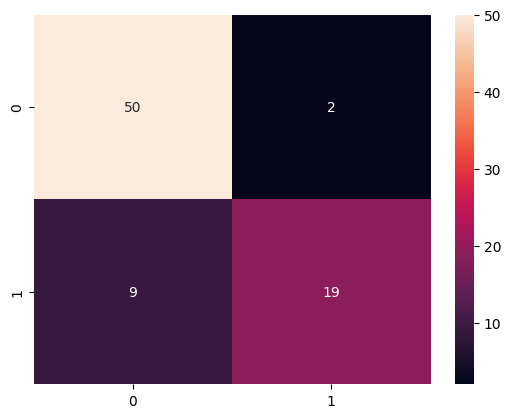

In [28]:
sns.heatmap(cm2,annot = True)

In [29]:
print(classification_report(y_test,y_pred_scaled))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

